In [1]:
#read the csv file with reviews and importing libraries
import pandas as pd
import numpy as np
reviews_df=pd.read_csv('K8 Reviews v0.2.csv',error_bad_lines=False)
reviews_df['review'] = reviews_df['review'].astype(str) 
reviews_df.head(6)

,sentiment,review
0,1,Good but need updates and improvements
1,0,"Worst mobile i have bought ever, Battery is dr..."
2,1,when I will get my 10% cash back.... its alrea...
3,1,Good
4,0,The worst phone everThey have changed the last...
5,0,Only I'm telling don't buyI'm totally disappoi...


In [2]:
#importing required libraries
import string
import nltk
from nltk import word_tokenize

In [3]:
#tokenising the review column
reviews_df['review'] = reviews_df.apply(lambda row: word_tokenize(row['review']), axis =1)
token_list = reviews_df['review'].tolist()

In [4]:
#importing stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [5]:
#removing stopwords and filtering
filtered_sentence = []
for w in token_list:
    for i in w:
        if i not in stop_words:
            filtered_sentence.append(i)

In [6]:
#display filtered sentence
filtered_sentence[0:5]

['Good', 'need', 'updates', 'improvements', 'Worst']

In [7]:
#removing punctuations
p = []
for w in filtered_sentence:
    if w not in string.punctuation:
        p.append(w)

In [8]:
#applying pos-tagging
postag = nltk.pos_tag(p)

In [9]:
#taking only the noun words
npos = []
for pos, tag in postag:
    if tag.startswith('N'):
        npos.append(pos)

In [10]:
#importing lemmatizer
from nltk.stem import WordNetLemmatizer
lemma_function = WordNetLemmatizer()

In [11]:
#applying lemmatization
lem = []
for w in npos:
    lem.append(lemma_function.lemmatize(w))

In [12]:
#importing gensim and other libraries
import gensim
from gensim import corpora
from gensim import models

In [13]:
#assigning lemmatized words to a dictonary
dictionary = corpora.Dictionary([lem])

In [14]:
#using doc2bow for convert the list into bag-of-words
corpus = [dictionary.doc2bow(text) for text in [lem]]

In [15]:
#assigning number of topic we want
NUM_topics = 12

In [16]:
#assigning LDA model
lda_model = models.LdaModel(corpus = corpus, num_topics=NUM_topics, id2word=dictionary, passes=15)

In [18]:
#printing the topics
print("LDA Model")

for idx in range(NUM_topics):
    print("Topic #%s: " % idx, lda_model.print_topic(idx, 10))

LDA Model
Topic #0:  0.001*"phone" + 0.000*"product" + 0.000*"camera" + 0.000*"battery" + 0.000*"problem" + 0.000*"quality" + 0.000*"issue" + 0.000*"Lenovo" + 0.000*"price" + 0.000*"Good"
Topic #1:  0.001*"phone" + 0.000*"camera" + 0.000*"product" + 0.000*"battery" + 0.000*"quality" + 0.000*"Lenovo" + 0.000*"problem" + 0.000*"note" + 0.000*"Battery" + 0.000*"issue"
Topic #2:  0.001*"phone" + 0.000*"camera" + 0.000*"battery" + 0.000*"product" + 0.000*"problem" + 0.000*"Lenovo" + 0.000*"quality" + 0.000*"time" + 0.000*"Good" + 0.000*"day"
Topic #3:  0.004*"phone" + 0.002*"camera" + 0.001*"battery" + 0.001*"issue" + 0.001*"problem" + 0.001*"product" + 0.001*"Lenovo" + 0.001*"quality" + 0.001*"time" + 0.001*"Battery"
Topic #4:  0.062*"phone" + 0.024*"camera" + 0.021*"battery" + 0.020*"product" + 0.015*"problem" + 0.014*"Lenovo" + 0.014*"issue" + 0.013*"quality" + 0.010*"time" + 0.009*"Good"
Topic #5:  0.000*"phone" + 0.000*"camera" + 0.000*"product" + 0.000*"battery" + 0.000*"Lenovo" + 0.0

In [19]:
#importing coherence model and find the value
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=token_list, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.25071758225


In [20]:
#importing pyLDAvis library
import pyLDAvis
import pyLDAvis.gensim

In [21]:
#visualizing the topic model
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
vis

PreparedData(topic_coordinates=            Freq  cluster  topics         x    y
topic                                           
4      99.999069        1       1  0.298876 -0.0
3       0.000085        1       2  0.007806  0.0
8       0.000085        1       3 -0.022304  0.0
7       0.000085        1       4 -0.020101 -0.0
2       0.000085        1       5 -0.024859  0.0
0       0.000085        1       6 -0.026948 -0.0
11      0.000085        1       7 -0.040732 -0.0
10      0.000085        1       8 -0.035859  0.0
9       0.000085        1       9 -0.028968 -0.0
6       0.000085        1      10 -0.034814 -0.0
5       0.000085        1      11 -0.037916 -0.0
1       0.000085        1      12 -0.034183  0.0, topic_info=      Category         Freq         Term        Total  loglift  logprob
term                                                                   
10201  Default  6134.000000        phone  6134.000000  30.0000  30.0000
5695   Default  2387.000000       camera  2387.000000  

In [22]:
#defining the function to find the adequate coherence values
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = models.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [24]:
#finding the coherence value
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=token_list, start=2, limit=40, step=6)

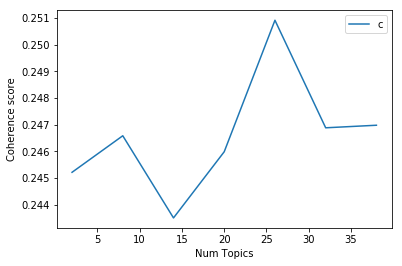

In [25]:
#plotting the graph for coherence value and number of adequate topics
import matplotlib.pyplot as plt
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()